In [1]:
import explanations
import pandas

# Preprocessing
Load all the CSVs, preprocess them and save the result to `clean-2018.csv`:

In [2]:
# I ended up using DataFrame.replace method instead of converters but I'm still wondering why isn't the
# converters solution working. There must be something I'm missing…

#translate = {col:lambda x,vals=vals: vals.get(x, x) for col, vals in explanations.decode_key.items()}

pandas.concat(
    (pandas.read_csv(
        filename,
        index_col=None,
        encoding='iso-8859-2',
        delimiter=';',
        header=None,
        names=explanations.main_columns,
        #converters=translate,
        low_memory=False
    ).assign(kraj=comment) for filename, comment in explanations.file_names.items()),
    ignore_index=True
).merge(
    pandas.read_csv(
        'CHODCI.csv',
        index_col=None,
        encoding='iso-8859-2',
        delimiter=';',
        header=None,
        names=explanations.ped_columns,
        #converters=translate,
        low_memory=False
    ),
    how='left',
    on='identifikacni_cislo',
).dropna(axis=1, how='all')                   \
.replace(explanations.decode_key, value=None) \
.to_csv('clean-2018.csv', index=False)

# Answers for assignment questions
Load the preprocessed data.

In [3]:
data = pandas.read_csv(
    'clean-2018.csv',
    low_memory=False
)

How many traffic accidents were there in 2018 according to input data?

In [4]:
lenght = len(data)
lenght

104765

Of them all, what is the percentage of fatal accidents?

In [5]:
fatal = data[data['usmrceno_osob'] > 0]
f"{len(fatal)/lenght*100}%"

'0.4858492817257672%'

How many fatalities were there in accidents involving bollards, traffic sign posts, etc.?

In [6]:
fatal[fatal['druh_pevne_prekazky'] == explanations.decode_key['druh_pevne_prekazky'][3]]['usmrceno_osob'].sum()

4

What percentage of accidents involving tram rails was fatal?

In [7]:
tram_tracks = data[data['situovani_nehody_na_komunikaci'] == explanations.decode_key['situovani_nehody_na_komunikaci'][7]]
tram_tracks_fatal = tram_tracks[tram_tracks['usmrceno_osob'] > 0]
f"{len(tram_tracks_fatal)/len(tram_tracks)*100}%"

'0.8771929824561403%'

Draw a plot that shows what percentage of accidents for a given brand of car happened in a turn. Include only those brands that were included in at least 50 accidents.

Text(0, 0.5, '')

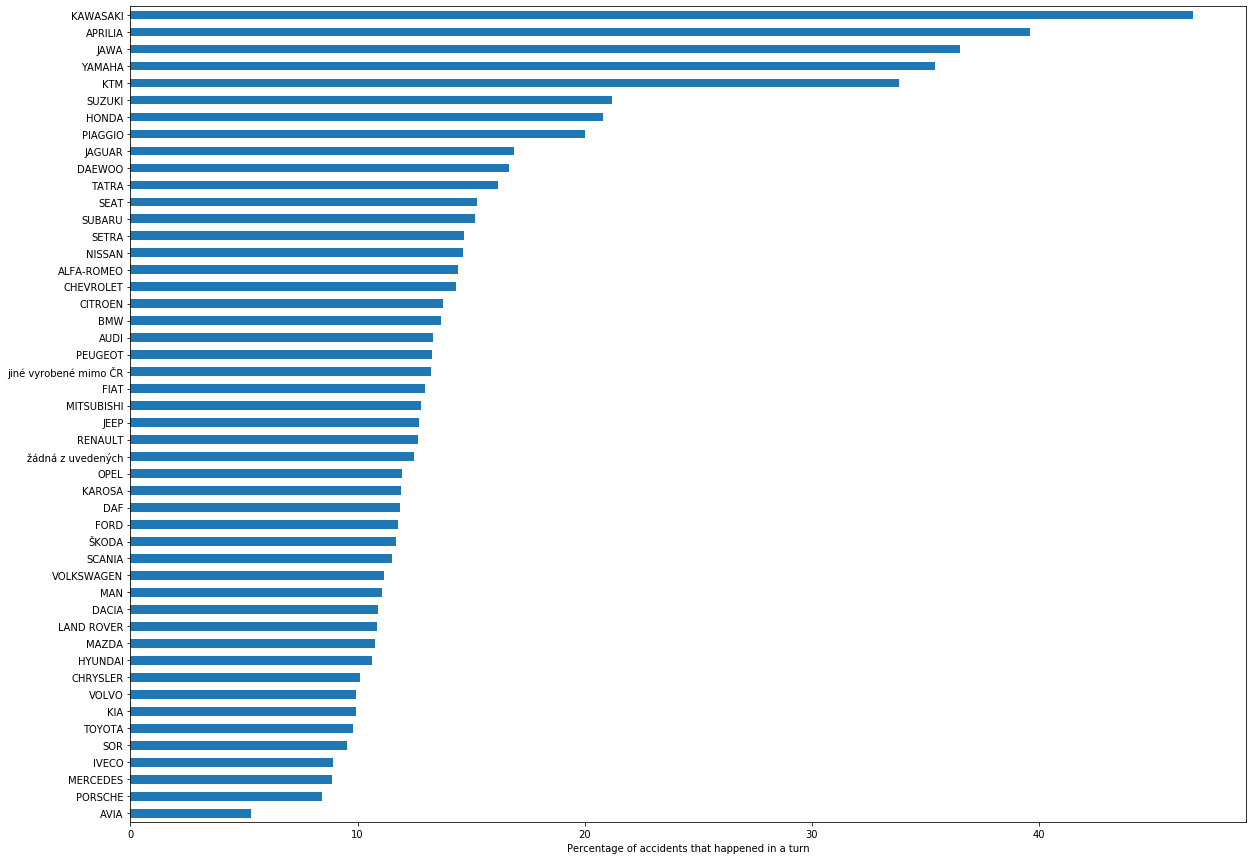

In [9]:
counts_turn = data[data['smerove_pomery'] == explanations.decode_key['smerove_pomery'][3]] \
              .groupby('vyrobni_znacka_motoroveho_vozidla').size()

counts_all = data.groupby('vyrobni_znacka_motoroveho_vozidla').size()

counts_turn = counts_turn[counts_all >= 50]
counts_all = counts_all[counts_all >= 50]

difs = counts_turn / counts_all * 100

plot = difs.sort_values().plot(
    kind='barh',
    figsize=(20, 15),
)

plot.set_xlabel('Percentage of accidents that happened in a turn')
plot.set_ylabel('')